<a href="https://colab.research.google.com/github/gopichandchalla16/infosys-internship-real-time-industry-insight-system/blob/anshika-dev/Infosys_Industry_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Infosys Springboard Internship Project
## Real-Time Industry Insight & Strategic Intelligence System
### Sprint 1 – Data Sourcing & Handling
**Team Members:** Gopichand, Anshika, Arnav, Narendra

**Objective:** Collect, clean, and visualize real-time company or market data from external open sources.


## Step 1: Interactive User Input
We allow users to enter a **company or asset name** to fetch relevant data dynamically.


In [11]:
# User input for asset/company
asset_name = input("Enter the company name (e.g., Infosys, Rakuten, Netflix): ").upper()
print(f"\nData analysis will be performed for: {asset_name}")

Enter the company name (e.g., Infosys, Rakuten, Netflix): TCS

Data analysis will be performed for: TCS


##  Step 2: Import Required Libraries
We use the following Python libraries:
- `requests` & `BeautifulSoup` for scraping web data
- `pandas` for data manipulation
- `matplotlib` & `seaborn` for visualization
- `textblob` for sentiment analysis
- `yfinance` for market data
- `wikipedia` for Wikipedia summaries


In [12]:
# Install required libraries (run once)
!pip install yfinance textblob beautifulsoup4 lxml wikipedia feedparser faker

# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import yfinance as yf
import wikipedia
from bs4 import BeautifulSoup
import feedparser
from faker import Faker
import random
import datetime

# Set seaborn style
sns.set(style="whitegrid")

## Step 3: Fetch Wikipedia Summary
We fetch a **short summary** of the asset/company from Wikipedia for context.


In [22]:
try:
    # Attempt to fetch summary by appending ' company' to the asset name
    try:
        wiki_summary = wikipedia.summary(f"{asset_name} company", sentences=5)
        print(" Wikipedia Summary:\n")
        print(wiki_summary)
    except wikipedia.exceptions.PageError:
        # If appending ' company' doesn't work, try the original asset name
        wiki_summary = wikipedia.summary({asset_name}, sentences=5)
        print(" Wikipedia Summary:\n")
        print(wiki_summary)
except Exception as e:
    print(f"Could not fetch Wikipedia summary: {e}")


Could not fetch Wikipedia summary: "TVS" may refer to: 
Topological vector space
Television Sydney
Television South
TVS Television Network
TVS (Poland)
TVS (Russia)
TV Syd
Southern Television Guangdong
TVS (Venezuela)
Sistema Brasileiro de Televisão
Television Saitama
TVS (São Tomé and Príncipe)
TVS (Malaysian TV channel)
T. V. Sundram Iyengar
TVS Group
TVS Electronics
TVS Motor
Tangshan Sannühe Airport
Transvaginal ultrasound
Transient voltage suppressor
Transient-voltage-suppression diode
Triggered vacuum switch
Trinity Valley School
The Virgin Suicides
Tornado vortex signature
T. V. Sankaranarayanan


## Step 4: Fetch Yahoo Finance Data
We fetch **historical market data** (last 30 days) for the asset using Yahoo Finance.

In [14]:
try:
    ticker = yf.Ticker(asset_name if asset_name.upper() in ["BTC-USD","TSLA","AAPL"] else "BTC-USD")
    market_data = ticker.history(period="1mo", interval="1d")
    market_data.reset_index(inplace=True)
    print(f"\n Market Data Sample for {asset_name}:")
    display(market_data.head())
except Exception as e:
    print(f"Could not fetch Yahoo Finance data: {e}")


 Market Data Sample for TCS:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-10-09 00:00:00+00:00,123337.070312,123739.343750,119812.031250,121705.585938,74653009425,0.0,0.0
1,2025-10-10 00:00:00+00:00,121704.742188,122509.664062,104582.414062,113214.367188,153125018868,0.0,0.0
2,2025-10-11 00:00:00+00:00,113236.429688,113429.726562,109760.562500,110807.882812,110236934340,0.0,0.0
3,2025-10-12 00:00:00+00:00,110811.515625,115805.062500,109715.539062,115169.765625,93710414091,0.0,0.0
4,2025-10-13 00:00:00+00:00,115161.679688,116020.484375,113821.187500,115271.078125,71582026739,0.0,0.0


## Step 5: Fetch Google News Headlines via RSS
We fetch **recent news headlines** about the asset using Google News RSS.


In [15]:
# Construct RSS feed URL for Google News
rss_url = f"https://news.google.com/rss/search?q={asset_name}&hl=en-US&gl=US&ceid=US:en"

feed = feedparser.parse(rss_url)
news_items = [{"Title": entry.title, "Link": entry.link, "Published": entry.published} for entry in feed.entries[:10]]
news_df = pd.DataFrame(news_items)
print(f"\n Top 10 News Headlines for {asset_name}:")
display(news_df)


 Top 10 News Headlines for TCS:


,Title,Link,Published
0,Charities at the 2025 TCS New York City Marath...,https://news.google.com/rss/articles/CBMilAFBV...,"Wed, 05 Nov 2025 22:03:54 GMT"
1,TCS' goIT Program Invites Students to Innovate...,https://news.google.com/rss/articles/CBMiXkFVX...,"Fri, 07 Nov 2025 11:25:30 GMT"
2,AI Push Drives Record Job Cuts at Top India Pr...,https://news.google.com/rss/articles/CBMitgFBV...,"Fri, 10 Oct 2025 07:00:00 GMT"
3,Marks & Spencer swaps out TCS for fresh helpde...,https://news.google.com/rss/articles/CBMidkFVX...,"Tue, 28 Oct 2025 07:00:00 GMT"
4,TCS denies losing UK’s Marks & Spencer contrac...,https://news.google.com/rss/articles/CBMi5wFBV...,"Mon, 27 Oct 2025 07:00:00 GMT"
5,2025 TCS New York City Marathon | Benson Kipru...,https://news.google.com/rss/articles/CBMipAFBV...,"Mon, 03 Nov 2025 04:25:00 GMT"
6,Tata Consultancy Services Refutes Losing M&S C...,https://news.google.com/rss/articles/CBMif0FVX...,"Mon, 27 Oct 2025 07:00:00 GMT"
7,Inside the Jaguar Land Rover hack: stalled sma...,https://news.google.com/rss/articles/CBMioAFBV...,"Sat, 20 Sep 2025 07:00:00 GMT"
8,TCS to celebrate Teachers of the Year at Novem...,https://news.google.com/rss/articles/CBMi4gFBV...,"Sat, 08 Nov 2025 22:00:00 GMT"
9,"Coffee with Larry, Episode 813, November 6, 20...",https://news.google.com/rss/articles/CBMiowFBV...,"Sun, 09 Nov 2025 03:29:13 GMT"


## Step 6: Generate Synthetic Tweets
We generate **50 realistic tweets** using `Faker` and random sentiment phrases for demonstration.


In [16]:
fake = Faker()
positive_phrases = [
    f"{asset_name} is surging! 🚀",
    f"Profits from {asset_name} are amazing!",
    f"Holding {asset_name} long-term, confident.",
    f"{asset_name} adoption is growing worldwide!",
    f"Investors are optimistic about {asset_name}."
]

negative_phrases = [
    f"Worried about {asset_name} volatility.",
    f"{asset_name} might crash soon.",
    f"{asset_name}'s future is uncertain.",
    f"High risks in {asset_name} investments.",
    f"{asset_name} energy consumption is concerning."
]

neutral_phrases = [
    f"{asset_name} price remains stable today.",
    f"Market watching {asset_name} closely.",
    f"{asset_name} updates coming soon.",
    f"{asset_name} performance unchanged.",
    f"Analysts report on {asset_name} today."
]

tweets = []
for _ in range(50):
    sentiment_choice = random.choices(
        ["positive", "negative", "neutral"], weights=[0.4, 0.3, 0.3]
    )[0]
    if sentiment_choice == "positive":
        tweets.append(random.choice(positive_phrases))
    elif sentiment_choice == "negative":
        tweets.append(random.choice(negative_phrases))
    else:
        tweets.append(random.choice(neutral_phrases))

tweets_df = pd.DataFrame(tweets, columns=["Tweet"])
tweets_df.head()

,Tweet
0,High risks in TCS investments.
1,"Holding TCS long-term, confident."
2,Investors are optimistic about TCS.
3,"Holding TCS long-term, confident."
4,TCS's future is uncertain.


## Step 7: Preprocess Tweets & Perform Sentiment Analysis
We analyze the **polarity** of each tweet using `TextBlob` and classify them into Positive, Negative, or Neutral.


In [17]:
# Sentiment polarity
tweets_df["Polarity"] = tweets_df["Tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)
# Sentiment category
tweets_df["Sentiment"] = tweets_df["Polarity"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)
tweets_df.head()

,Tweet,Polarity,Sentiment
0,High risks in TCS investments.,0.16,Positive
1,"Holding TCS long-term, confident.",0.50,Positive
2,Investors are optimistic about TCS.,0.00,Neutral
3,"Holding TCS long-term, confident.",0.50,Positive
4,TCS's future is uncertain.,0.00,Neutral


## Step 8: Visualize Sentiment Distribution
We create a **bar chart** showing how many tweets fall into each sentiment category.

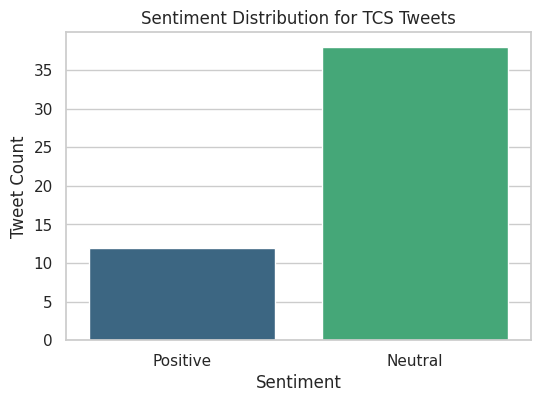

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=tweets_df, x="Sentiment", hue="Sentiment", palette="viridis", legend=False)
plt.title(f"Sentiment Distribution for {asset_name} Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

## Step 9: Visualize Sentiment Trend Across Tweets
We create a **line chart** showing polarity trend across the 50 tweets.


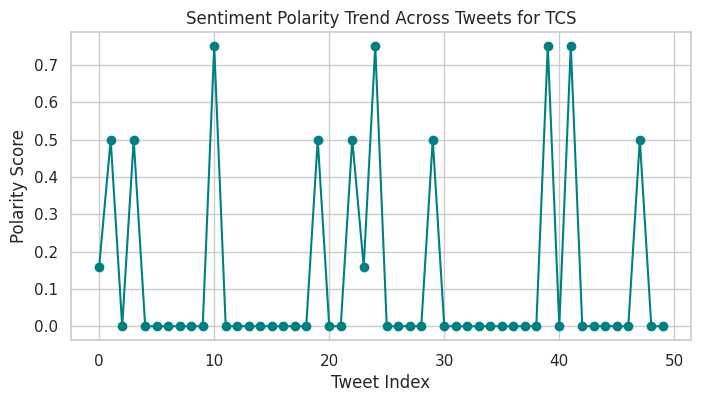

In [19]:
plt.figure(figsize=(8,4))
plt.plot(tweets_df.index, tweets_df["Polarity"], marker='o', linestyle='-', color='teal')
plt.title(f"Sentiment Polarity Trend Across Tweets for {asset_name}")
plt.xlabel("Tweet Index")
plt.ylabel("Polarity Score")
plt.grid(True)
plt.show()

## Step 10: Visualize Market Price Trend
For context, we visualize the closing price of the asset over the last 30 days.


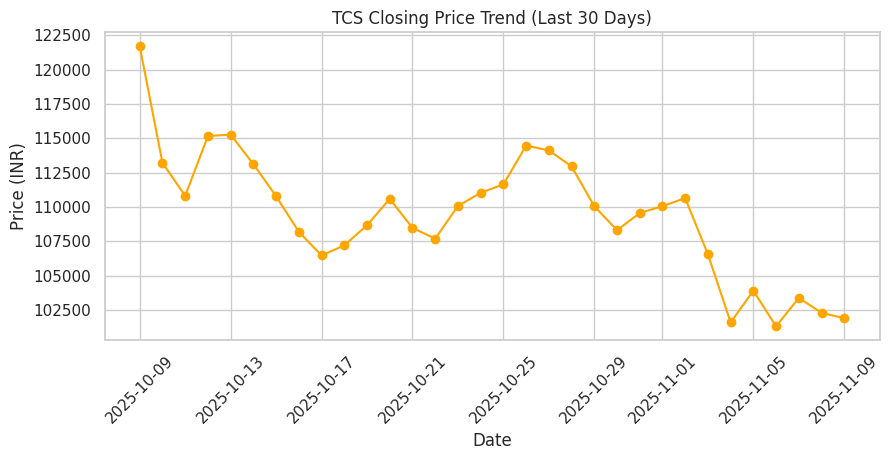

In [20]:
plt.figure(figsize=(10,4))
plt.plot(market_data["Date"], market_data["Close"], marker='o', color='orange')
plt.title(f"{asset_name} Closing Price Trend (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()